In [14]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot

import matplotlib.lines as mlines
import knunu_utils

from bayesian_pyhf import plotting
import arviz as az
import corner

In [15]:
null = knunu_utils.null_pred()
alt = knunu_utils.alt_pred()

In [16]:
model, alt_yields = modifier.load('knunu_model.json', alt.distribution, null.distribution, return_data=True)

## Load and plot samples

In [17]:
post_data = az.from_json( '../samples_multiply/knunu_large_post_data.json')
post_pred = az.from_json( '../samples_multiply/knunu_large_post_pred.json')
prior_pred = az.from_json('../samples_multiply/knunu_large_prior_pred.json')

In [18]:
post_data.posterior

<xarray.Dataset>
Dimensions:                    (chain: 8, draw: 100000, cvr_dim_0: 1,
                                csr_dim_0: 1, FFK_decorrelated[0]_dim_0: 1,
                                FFK_decorrelated[1]_dim_0: 1,
                                FFK_decorrelated[2]_dim_0: 1,
                                FFK_decorrelated[3]_dim_0: 1,
                                FFK_decorrelated[4]_dim_0: 1,
                                FFK_decorrelated[5]_dim_0: 1,
                                FFK_decorrelated[6]_dim_0: 1,
                                FFK_decorrelated[7]_dim_0: 1, mu_dim_0: 1,
                                stat_dim_0: 8, cvl_dim_0: 1, csl_dim_0: 1,
                                ctl_dim_0: 1)
Coordinates: (12/17)
  * chain                      (chain) int64 0 1 2 3 4 5 6 7
  * draw                       (draw) int64 0 1 2 3 ... 99996 99997 99998 99999
  * cvr_dim_0                  (cvr_dim_0) int64 0
  * csr_dim_0                  (csr_dim_0) int64 0
  * FFK_decorrelated[0]_dim_0  (FFK_decorrelated[0]_dim_0) int64 0
  * FFK_decorrelated[1]_dim_0  (FFK_decorrelated[1]_dim_0) int64 0
    ...                         ...
  * FFK_decorrelated[7]_dim_0  (FFK_decorrelated[7]_dim_0) int64 0
  * mu_dim_0                   (mu_dim_0) int64 0
  * stat_dim_0                 (stat_dim_0) int64 0 1 2 3 4 5 6 7
  * cvl_dim_0                  (cvl_dim_0) int64 0
  * csl_dim_0                  (csl_dim_0) int64 0
  * ctl_dim_0                  (ctl_dim_0) int64 0
Data variables: (12/15)
    cvr                        (chain, draw, cvr_dim_0) float64 -1.371e-11 .....
    csr                        (chain, draw, csr_dim_0) float64 -9.147e-11 .....
    FFK_decorrelated[0]        (chain, draw, FFK_decorrelated[0]_dim_0) float64 ...
    FFK_decorrelated[1]        (chain, draw, FFK_decorrelated[1]_dim_0) float64 ...
    FFK_decorrelated[2]        (chain, draw, FFK_decorrelated[2]_dim_0) float64 ...
    FFK_decorrelated[3]        (chain, draw, FFK_decorrelated[3]_dim_0) float64 ...
    ...                         ...
    FFK_decorrelated[7]        (chain, draw, FFK_decorrelated[7]_dim_0) float64 ...
    mu                         (chain, draw, mu_dim_0) float64 1.0 1.0 ... 1.0
    stat                       (chain, draw, stat_dim_0) float64 1.008 ... 0....
    cvl                        (chain, draw, cvl_dim_0) float64 14.02 ... 14.27
    csl                        (chain, draw, csl_dim_0) float64 3.791 ... 3.938
    ctl                        (chain, draw, ctl_dim_0) float64 0.7705 ... 1.161
Attributes:
    created_at:                 2024-05-10T11:47:31.446715
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.10.2
    sampling_time:              4877.473473548889
    tuning_steps:               10000

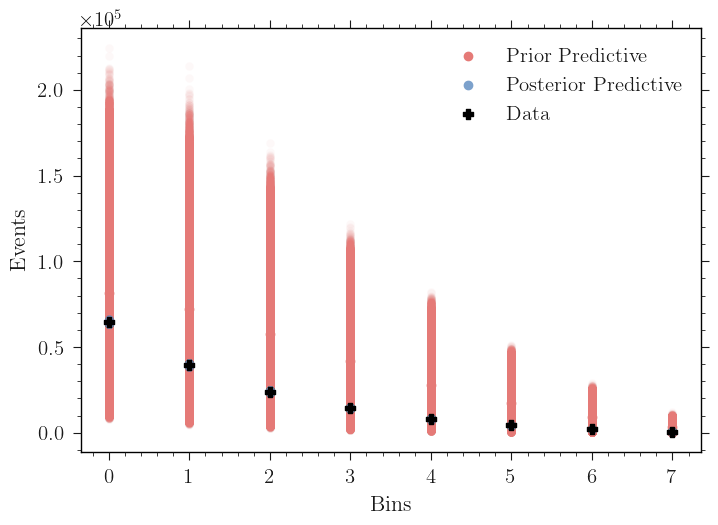

In [19]:
plotting.prior_posterior_predictives(model=model, data=alt_yields, post_pred=post_pred, prior_pred=prior_pred)
plt.show()

array([<Axes: title={'center': '94.0% HDI'}>,
       <Axes: title={'center': 'ess'}>, <Axes: title={'center': 'r_hat'}>],
      dtype=object)

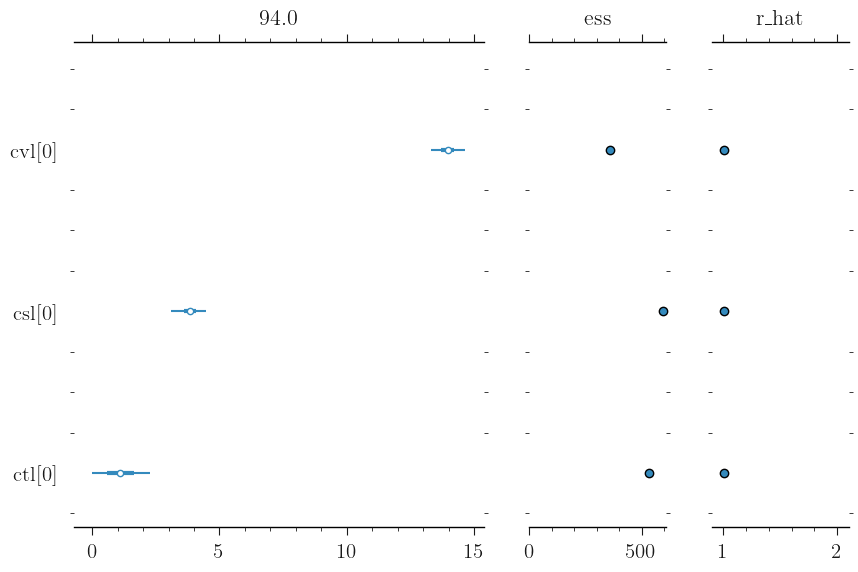

In [20]:
az.plot_forest(post_data, var_names=['cvl', 'csl', 'ctl'], combined=True, ess=True, r_hat=True)

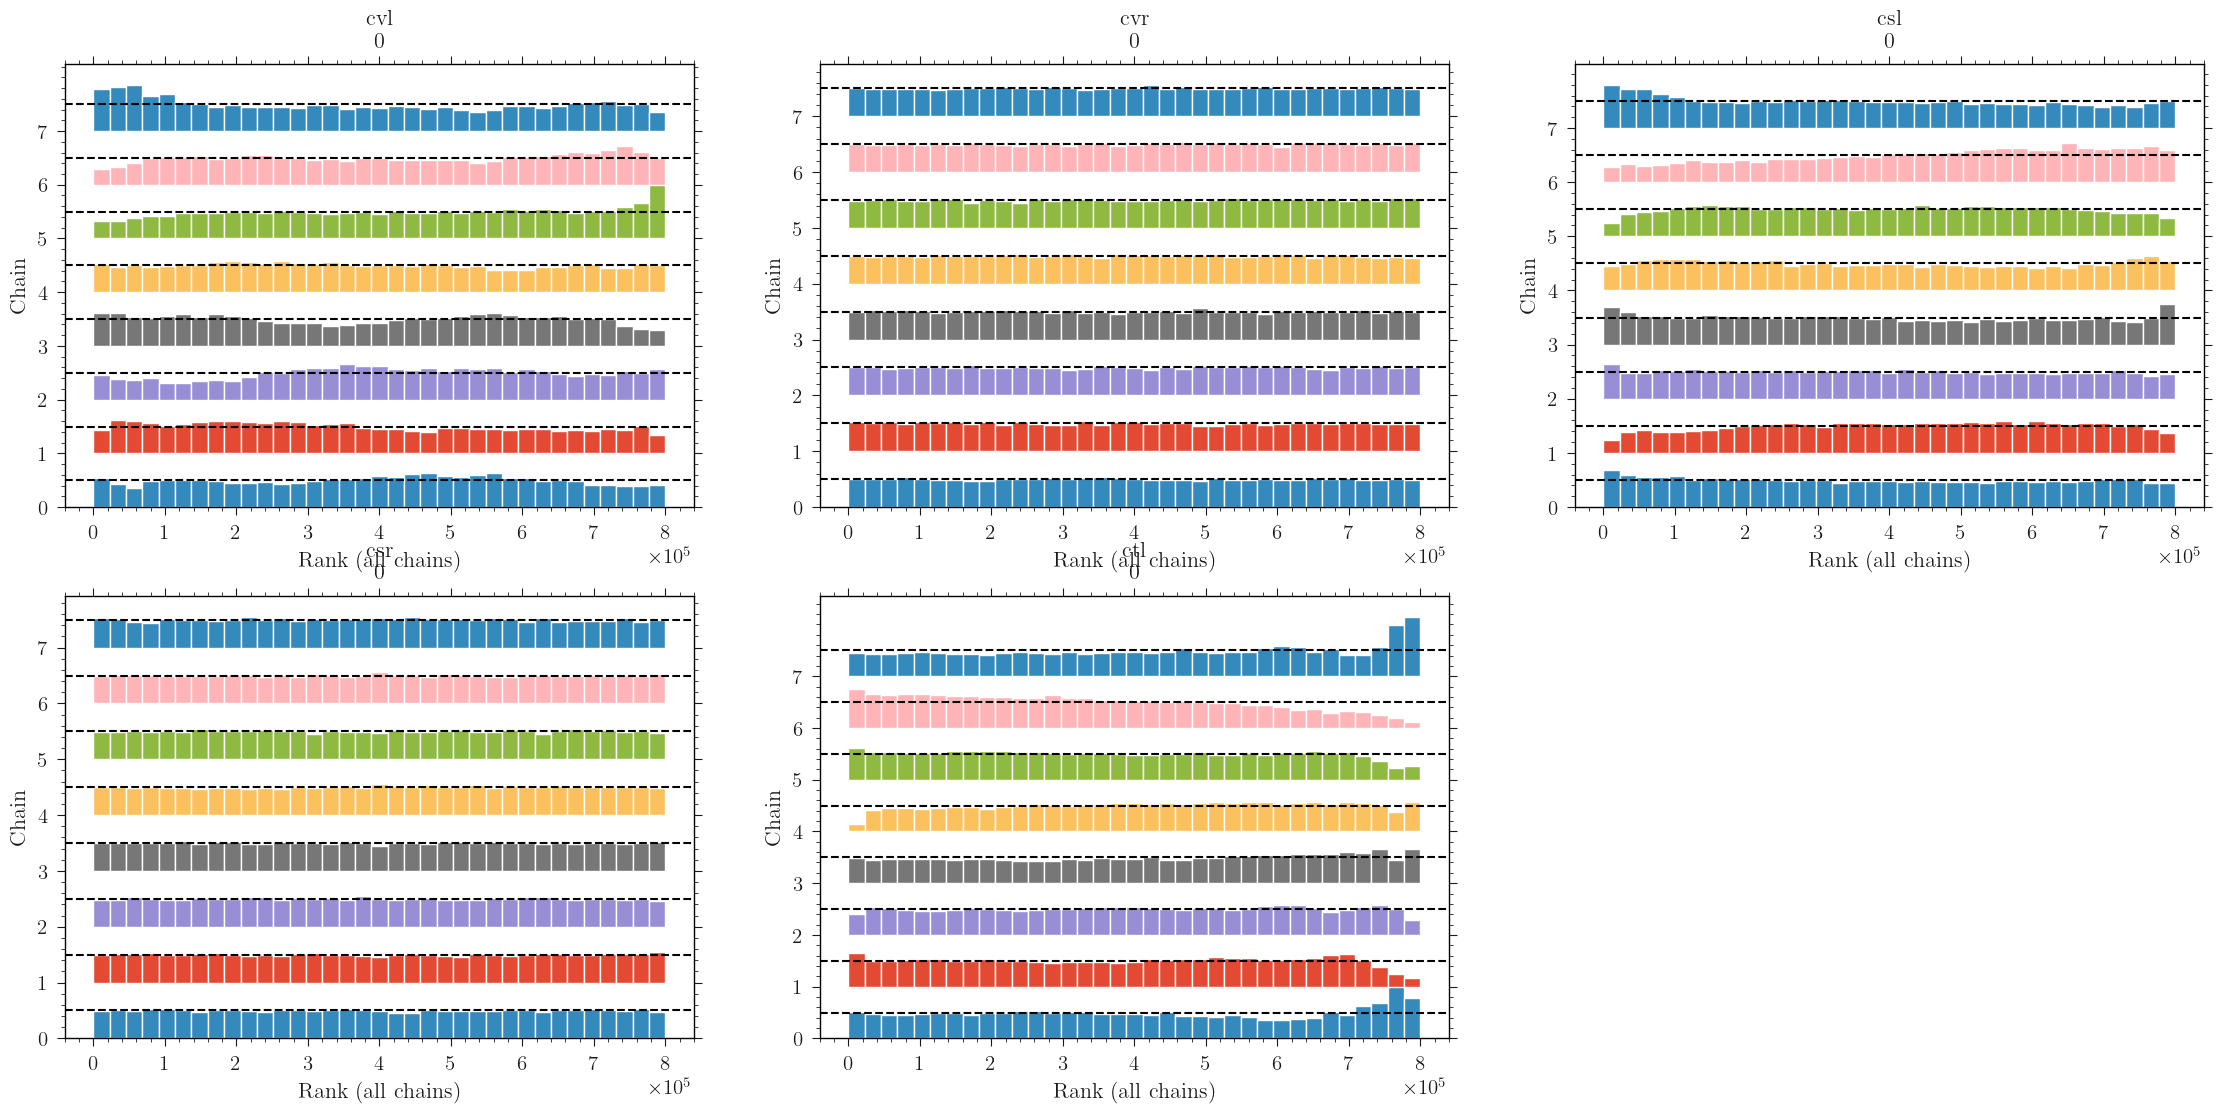

In [21]:
az.plot_rank(post_data, var_names=['cvl', 'cvr', 'csl', 'csr', 'ctl']);


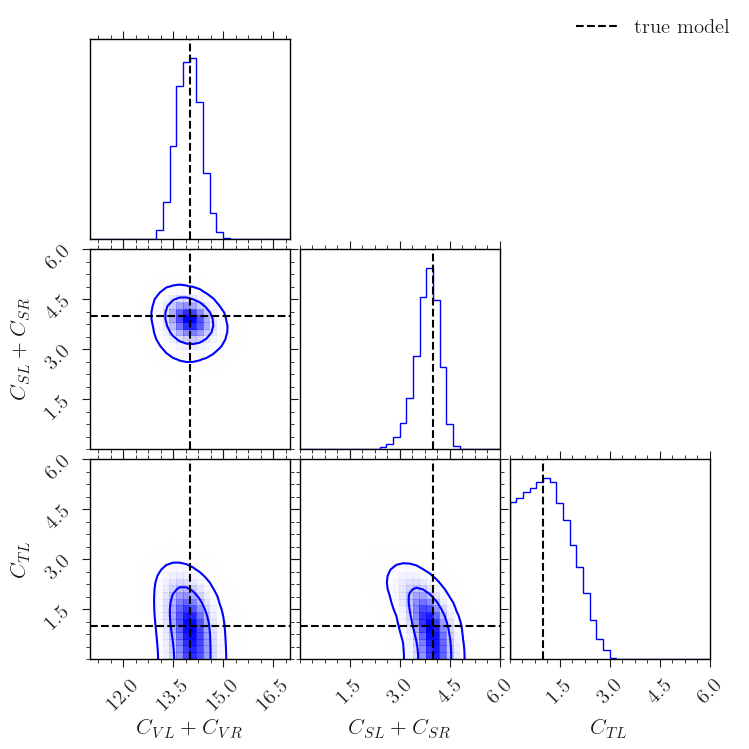

In [22]:
cv = r'$C_{VL} + C_{VR}$'
cs = r'$C_{SL} + C_{SR}$'
ct = r'$C_{TL}$'
labels = [cv, cs, ct]

file = 'results/knunu_samples.pdf'


fig = corner.corner(post_data.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=30, 
                    levels=(0.68, 0.95), 
                    # quantiles=(0.025, 0.975), 
                    range = [(11, 17), (0,6), (0,6)],
                    smooth=1.5,
                    labels=labels,
                    color='blue',
                    plot_datapoints=False
                    );

truewcs = [14, 4, 1]
corner.overplot_lines(fig, truewcs, color='k', label='true model', linestyle='--')

handles, labs = fig.axes[0].get_legend_handles_labels()
by_label = dict(zip(labs, handles))
fig.legend(by_label.values(), by_label.keys())

# plt.savefig(file)
plt.show()

## Compare large / small


In [23]:
post_data_small = az.from_json( '../samples_multiply/knunu_small_post_data.json')
post_data_large = az.from_json( '../samples_multiply/knunu_large_post_data.json')

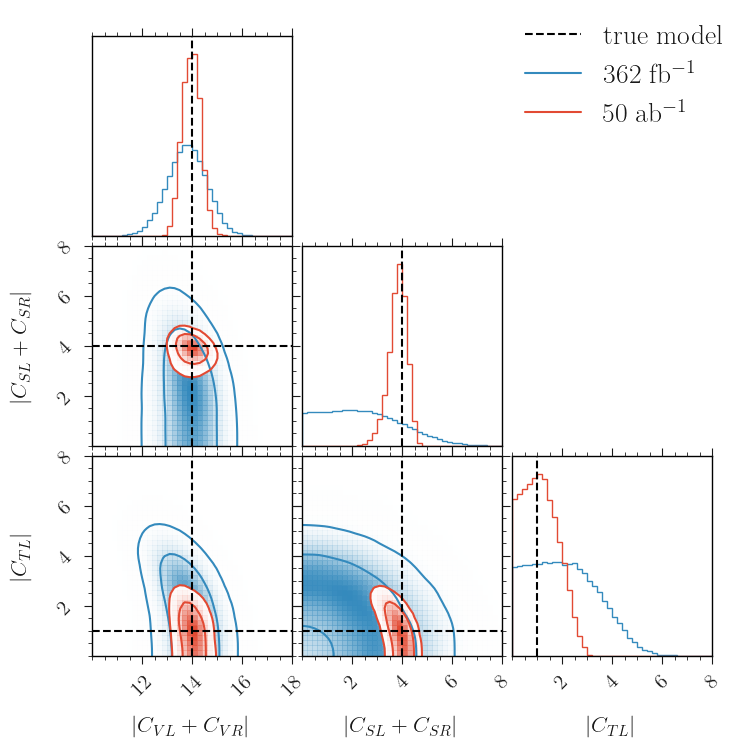

In [24]:
cv = r'$|C_{VL} + C_{VR}|$'
cs = r'$|C_{SL} + C_{SR}|$'
ct = r'$|C_{TL}|$'
labels = [cv, cs, ct]

file = '../results/knunu_samples.pdf'

fig = corner.corner(post_data_small.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=40, 
                    levels=(0.68, 0.95), 
                    range = [(10., 18), (0,8), (0,8)],
                    smooth=1.5,
                    labels=labels,
                    color='C0',
                    plot_datapoints=False,
                    hist_kwargs={'density': True},
                    );

fig = corner.corner(post_data_large.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=40, 
                    levels=(0.68, 0.95), 
                    range = [(10., 18), (0,8), (0,8)],
                    smooth=1.0,
                    labels=labels,
                    color='C1',
                    plot_datapoints=False,
                    hist_kwargs={'density': True},
                    fig=fig
                    );

truewcs = [14, 4, 1]
corner.overplot_lines(fig, truewcs, color='k', label='true model', linestyle='--')
# corner.overplot_points(fig, truewcs[None], marker="s", color="C1")

fig.legend(
        handles = fig.axes[0].get_legend_handles_labels()[0] + [
            mlines.Line2D([], [], color='C0', label=r'362 fb$^{-1}$'),
            mlines.Line2D([], [], color='C1', label=r'50 ab$^{-1}$'),
        ],
        fontsize=20, loc="upper right"
    )

plt.savefig(file)
plt.show()


## Compare to simple reweighting


In [25]:
post_data_large = az.from_json(   '../samples_multiply/knunu_large_post_data.json')
post_data_large_1b = az.from_json('../samples_multiply/knunu_large_1b_post_data.json')

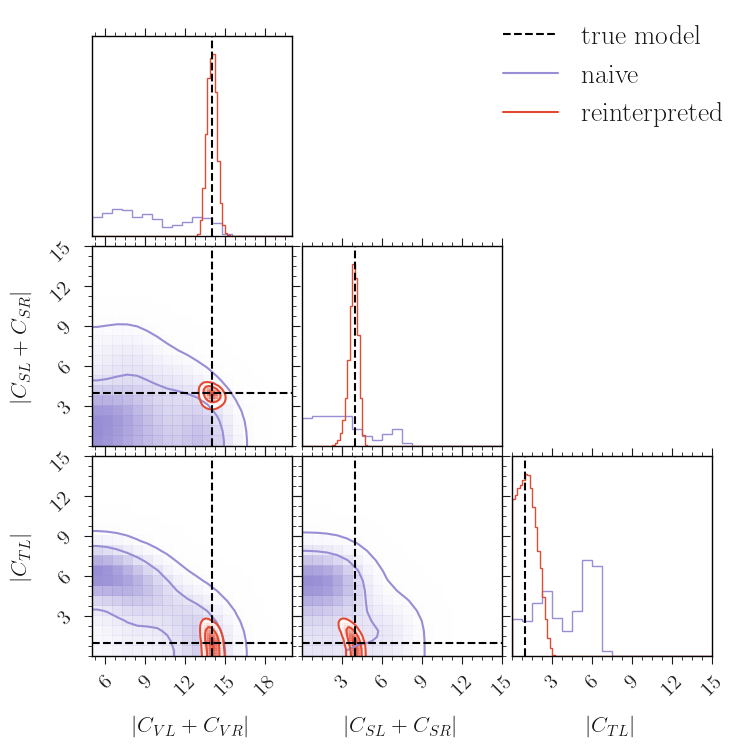

In [28]:
cv = r'$|C_{VL} + C_{VR}|$'
cs = r'$|C_{SL} + C_{SR}|$'
ct = r'$|C_{TL}|$'
labels = [cv, cs, ct]

file = '../results/knunu_samples_compare.pdf'

fig = corner.corner(post_data_large_1b.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=20, 
                    levels=(0.68, 0.95), 
                    range = [(5., 20.), (0,15), (0,15)],
                    smooth=2.1,
                    labels=labels,
                    color='C2',
                    plot_datapoints=False,
                    hist_kwargs={'density': True},
                    );

fig = corner.corner(post_data_large.posterior, 
                    var_names=['cvl', 'csl', 'ctl'],
                    bins=80, 
                    levels=(0.68, 0.95), 
                    range = [(5., 20.), (0,15), (0,15)],
                    smooth=1.0,
                    labels=labels,
                    color='C1',
                    plot_datapoints=False,
                    hist_kwargs={'density': True},
                    fig=fig
                    );

corner.overplot_lines(fig, truewcs, color='k', label='true model', linestyle='--')

fig.legend(
        handles = fig.axes[0].get_legend_handles_labels()[0] + [
            mlines.Line2D([], [], color='C2', label='naive'),
            mlines.Line2D([], [], color='C1', label='reinterpreted'),
        ],
        fontsize=20, loc="upper right"
    )

plt.savefig(file)
plt.show()
